# 参数设置

In [1]:
# 数据集文件夹名
wine.dataset.folder <- "datasets"

# 图像文件夹名
figure.folder <- "figures"

# 模型结果文件夹名
model.summary.folder <- "model-summary"

# 数据集名称
red.wine.filename <- "winequality-red.csv"
white.wine.filename <- "winequality-white.csv"

# 酒品分析结果文件夹
red.wine.folder <- "red-wine"
white.wine.folder <- "white-wine"

# 分割线
seperation.line <- "-------------------------------------------------------------------------\n"

# 加载 packages
library(ggplot2)

# 红酒分析

## 描述性统计

In [28]:
# 读取红酒数据
red.wine.path <- file.path(wine.dataset.folder, red.wine.filename)
red.wine <- read.csv(red.wine.path,sep = ";")

red.wine.summary <- summary(red.wine)
red.wine.summary

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

### 酒品频率统计

In [3]:
# 获取频率直方图
frequency_table <- table(red.wine$quality)
red.wine.quality.frequency.figure.path <- file.path(red.wine.folder, figure.folder, "quality-frequency.png")

# 保存图像
png(filename = red.wine.quality.frequency.figure.path) 
barplot(frequency_table, main = "Frequency of Integer Values", xlab = "Integer Values", ylab = "Frequency")
dev.off()

png 
  2

### 特征与酒品箱线图

#### pH-酒品箱线图

Saving 6.67 x 6.67 in image


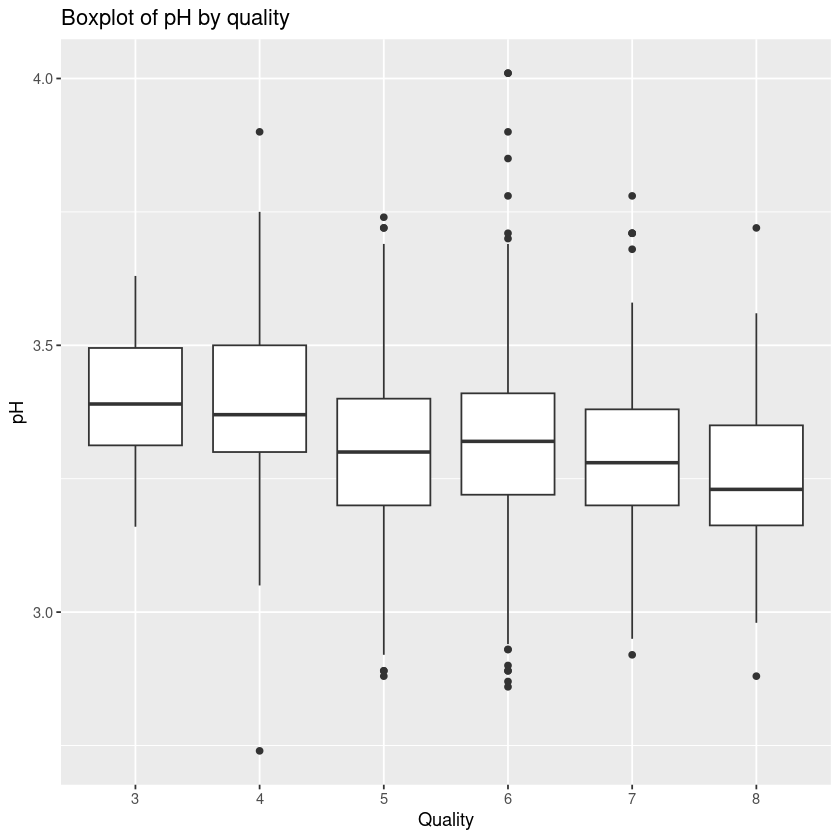

In [4]:
# 获取箱线图数据
num_categories <- 5  # 设定分成的类别数量

# 绘图
figure.path <- file.path(red.wine.folder, figure.folder, "pH-boxplot.png")
ggplot(red.wine, aes(x = factor(quality), y = pH,group = factor(quality))) +
  geom_boxplot() +
  labs(x = "Quality", y = "pH", title = "Boxplot of pH by quality")
ggsave(figure.path)

#### 固定酸度-酒品箱线图

Saving 6.67 x 6.67 in image


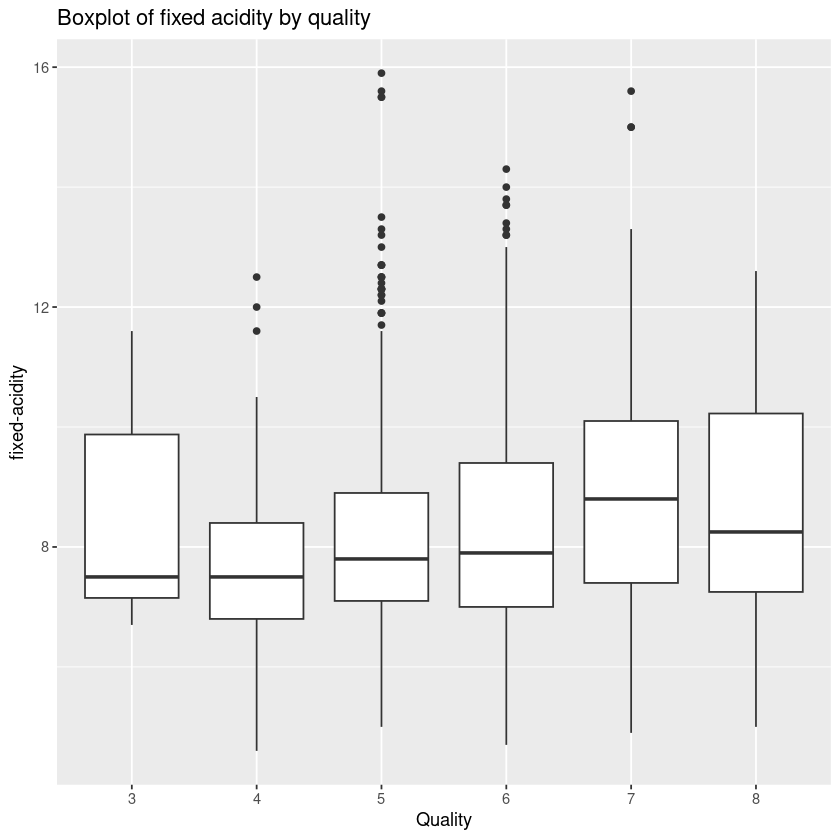

In [5]:
# 获取箱线图数据
num_categories <- 5  # 设定分成的类别数量

# 绘图
figure.path <- file.path(red.wine.folder, figure.folder, "fixed-acidity-boxplot.png")
ggplot(red.wine, aes(x = factor(quality), y = fixed.acidity,group = factor(quality))) +
  geom_boxplot() +
  labs(x = "Quality", y = "fixed-acidity", title = "Boxplot of fixed acidity by quality")
ggsave(figure.path)

## 模型拟合

In [6]:
save_red_wine_model_summary <- function(model, file_name) {
  # 创建完整文件路径
  file_path <- file.path(red.wine.folder, model.summary.folder, paste0(file_name, ".txt"))

  # 将summary输出捕获到字符向量
  summary_text <- capture.output(summary(model))

  # 将summary输出写入txt文件
  writeLines(summary_text, file_path)

  cat("Model summary saved to:", file_path, "\n")
}

### 线性回归全模型

Model summary saved to: red-wine/model-summary/linear_model.txt 


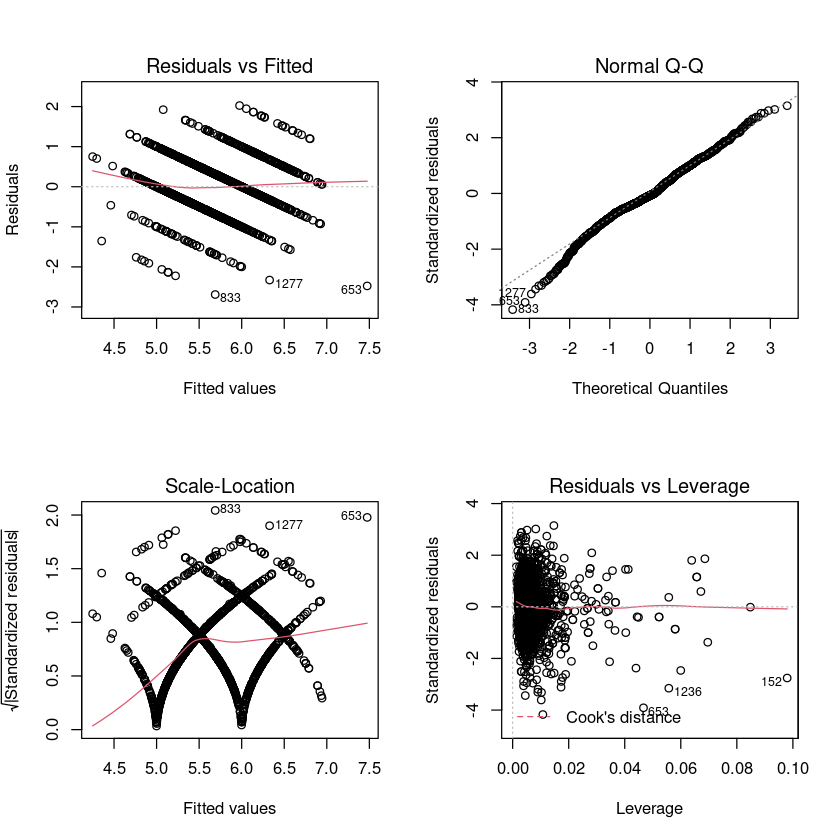

In [7]:
linear.model <- lm(quality ~ ., data = red.wine)
save_red_wine_model_summary(linear.model, "linear_model")
par(mfrow = c(2, 2))
plot(linear.model)

# 白酒分析

## 描述性统计

In [8]:
white.wine.path <- file.path(wine.dataset.folder, white.wine.filename)
white.wine <- read.csv(white.wine.path, sep = ";")

str(white.wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


### 酒品频率统计

In [9]:
# 获取频率直方图
frequency_table <- table(white.wine$quality)
white.wine.quality.frequency.figure.path <- file.path(white.wine.folder, figure.folder, "quality-frequency.png")

# 保存图像
png(filename = white.wine.quality.frequency.figure.path) 
barplot(frequency_table, main = "Frequency of Integer Values", xlab = "Integer Values", ylab = "Frequency")
dev.off()

png 
  2

### 特征与酒品箱线图

## 模型拟合

In [10]:
save_white_wine_model_summary <- function(model, file_name) {
  # 创建完整文件路径
  file_path <- file.path(white.wine.folder, model.summary.folder, paste0(file_name, ".txt"))

  # 将summary输出捕获到字符向量
  summary_text <- capture.output(summary(model))

  # 将summary输出写入txt文件
  writeLines(summary_text, file_path)

  cat("Model summary saved to:", file_path, "\n")
}

#### 线性回归全模型

Model summary saved to: white-wine/model-summary/linear_model.txt 


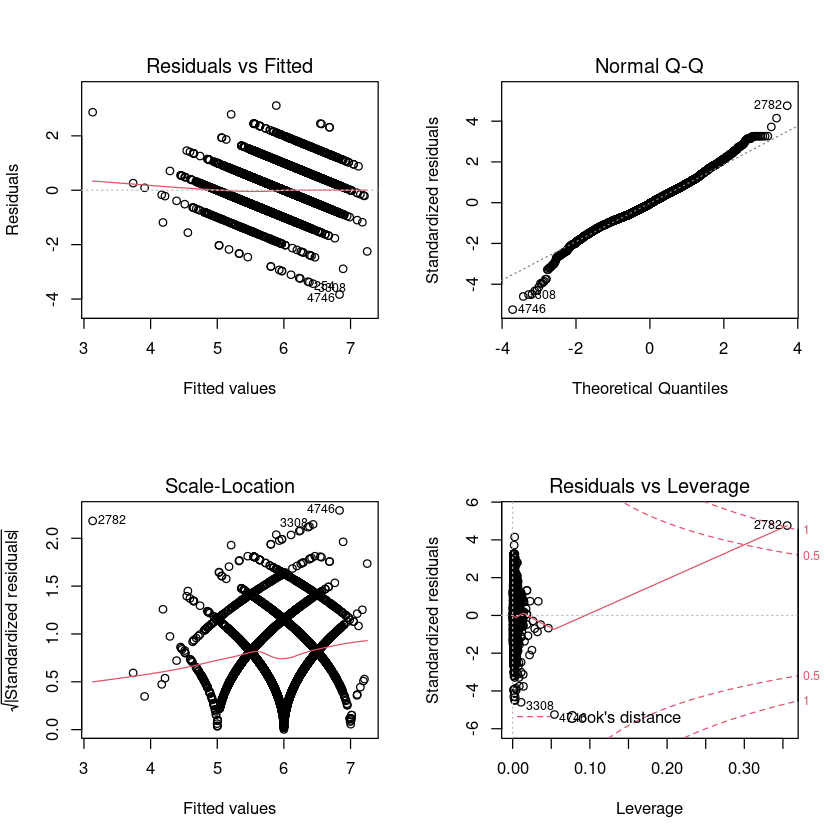

In [11]:
linear.model <- lm(quality ~ ., data = white.wine)
save_white_wine_model_summary(linear.model, "linear_model")
par(mfrow = c(2, 2))
plot(linear.model)